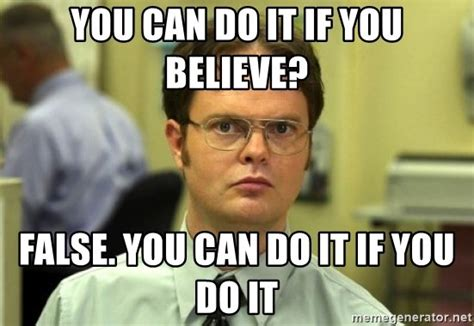

In [31]:
import IPython
url = 'https://www.memesmonkey.com/images/memesmonkey/cd/cd61037d32465fbe3ff0de815d398412.jpeg'
IPython.display.Image(url, width = 550)

In [ ]:
#Importer les libraries needed!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [114]:

import mysql.connector
# Etant donnée qu'on a deux bases de données, on se connecte en premier à la première qui est production
db=mysql.connector.connect(host="127.0.0.1",port="3306", user="ahmed",database="production",auth_plugin="mysql_native_password")
#db = mysql.connector.connect(user='ahmed', database='production')

   #


d = db.cursor()
d.execute("select * from brands")

for i in d:
    print(i)   # Afficher les lignes 'data' de la table brands

(1, 'Electra')
(2, 'Haro')
(3, 'Heller')
(4, 'Pure Cycles')
(5, 'Ritchey')
(6, 'Strider')
(7, 'Sun Bicycles')
(8, 'Surly')
(9, 'Trek')


In [113]:

#Se connecter à la deuxième base de données!!
db2=mysql.connector.connect(
   host="127.0.0.1",
   port="3306",
   user="root",
   database="sales"
)



In [63]:
d2 = db2.cursor()
d2.execute("select * from customers")

for i in d2:
    print(i)
d2

(1, 'Debra', 'Burks', None, 'debra.burks@yahoo.com', '9273 Thorne Ave. ', 'Orchard Park', 'NY', '14127')
(2, 'Kasha', 'Todd', None, 'kasha.todd@yahoo.com', '910 Vine Street ', 'Campbell', 'CA', '95008')
(3, 'Tameka', 'Fisher', None, 'tameka.fisher@aol.com', '769C Honey Creek St. ', 'Redondo Beach', 'CA', '90278')
(4, 'Daryl', 'Spence', None, 'daryl.spence@aol.com', '988 Pearl Lane ', 'Uniondale', 'NY', '11553')
(5, 'Charolette', 'Rice', '(916) 381-6003', 'charolette.rice@msn.com', '107 River Dr. ', 'Sacramento', 'CA', '95820')
(6, 'Lyndsey', 'Bean', None, 'lyndsey.bean@hotmail.com', '769 West Road ', 'Fairport', 'NY', '14450')
(7, 'Latasha', 'Hays', '(716) 986-3359', 'latasha.hays@hotmail.com', '7014 Manor Station Rd. ', 'Buffalo', 'NY', '14215')
(8, 'Jacquline', 'Duncan', None, 'jacquline.duncan@yahoo.com', '15 Brown St. ', 'Jackson Heights', 'NY', '11372')
(9, 'Genoveva', 'Baldwin', None, 'genoveva.baldwin@msn.com', '8550 Spruce Drive ', 'Port Washington', 'NY', '11050')
(10, 'Pameli

# Write a SQL query of Total Orders

In [75]:
q1 = (
      'SELECT count(order_id) AS Total_Orders '
      'FROM orders'
      )


d3 = db2.cursor()
d3.execute(q1)
d3


In [76]:
# Convert the SQL query to Pandas data Frame
df = pd.DataFrame(d3.fetchall())
df


,0
0,1615


In [ ]:
#df.rename(columns=[ "customer_id", "first_name", "last_name", "phone" ,"email" ,"street" ,"city" ,"state","zip_code",])

In [105]:
def read_querry_results (db,q):
        cursor= db.cursor()  #Call Sales data base
        cursor.execute(q)  # Execute Query 1
  
  #fetch all the matching rows 
        result = cursor.fetchall()
  
  #loop through the rows
        for row in result:
                 print(row)
                 print("\n") 
                    
                    
                    

In [106]:
read_querry_results (db2,q1)

(1615,)




In [77]:
#Use data frame
df1 = pd.read_sql(q1, db2)


/home/ahmed/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [78]:
df1

,Total_Orders
0,1615


In [79]:
type(df1)

pandas.core.frame.DataFrame

# 1- Display the whole list of product 

In [80]:
q1 = (
'select * from products'
)

df = pd.read_sql(q1,db)
df

/home/ahmed/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


Find the maximum value of list price using Pandas

In [81]:
df['list_price'].max()

11999.99

Check if we got null values in this table!

In [82]:
df.isnull().sum()

product_id      0
product_name    0
brand_id        0
category_id     0
model_year      0
list_price      0
dtype: int64

In [83]:
df.describe()

,product_id,brand_id,category_id,model_year,list_price
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,161.000000,5.476636,4.028037,2017.591900,1520.591402
std,92.808944,3.708131,2.188569,0.665063,1612.152765
min,1.000000,1.000000,1.000000,2016.000000,89.990000
25%,81.000000,1.000000,2.000000,2017.000000,439.990000
50%,161.000000,7.000000,3.000000,2018.000000,761.990000
75%,241.000000,9.000000,6.000000,2018.000000,2299.990000
max,321.000000,9.000000,7.000000,2019.000000,11999.990000


# 2- Write a SQL query of Total orderd items!

In [100]:
q2 = (  
    'SELECT count(a.order_id) AS Total_Orders,'      
       'sum(b.list_price + b.discount) AS Total_Sales FROM orders AS a INNER JOIN order_items AS b ON a.order_id = b.order_id'       )  # Convert the SQL query to Pandas data Frame df2 = pd.read_sql(q2, db2) df2
#d4 = db2.cursor()
#d4.execute()
# Convert the SQL query to Pandas data Frame
df2 = pd.read_sql(q2, db2)
df2

,Total_Orders,Total_Sales
0,4722,5726904.14


# 3- Calculate Monthly Sales 

In [102]:
q3 = ('SELECT month(order_date) AS date, '
      ' COUNT(order_id) AS order_qty '
      'FROM orders '
      'GROUP BY month(order_date) ' 
     )

In [103]:
#Convert the SQL query to Pandas data Frame
r3 = pd.read_sql(q3, db2)
r3.head(5)

/home/ahmed/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,date,order_qty
0,1,152
1,2,141
2,3,190
3,4,225
4,5,108


# 4- Write a SQL query of Selling Product Categories Quantity

In [106]:

q4 = (
      'SELECT a.category_name AS product, '
      'COUNT(b.product_name) AS qty '
      'FROM production.categories AS a '
      'INNER JOIN production.products AS b '
      'ON a.category_id = b.category_id '
      'GROUP BY product '
      'ORDER BY qty DESC '
      )

# Convert the SQL query to Pandas data Frame
r4 = pd.read_sql(q4, db)
r4_top = r4.head(5)
r4_top

,product,qty
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30


In [107]:
# Plotting selling product categories quantity data
fig3 = px.bar(r4_top, x="qty", y="product", orientation='h', barmode="group", title='Top 5 Selling Product Categories in Brazilian E-Commerce (2016-2018)')
fig3.update_layout(yaxis={'categoryorder':'total ascending'})
fig3.show()

# 5-shipped_dat ordred by year!

In [115]:
q2 = (
      'SELECT month(order_date) AS date, '
      ' COUNT(order_id) AS order_qty '
      'FROM orders '
      'GROUP BY month(order_date) '
      
      )

# Convert the SQL query to Pandas data Frame
r2 = pd.read_sql(q2, db2)
r2

,date,order_qty
0,1,152
1,2,141
2,3,190
3,4,225
4,5,108
5,6,109
6,7,106
7,8,130
8,9,121
9,10,130


<AxesSubplot:xlabel='date', ylabel='order_qty'>

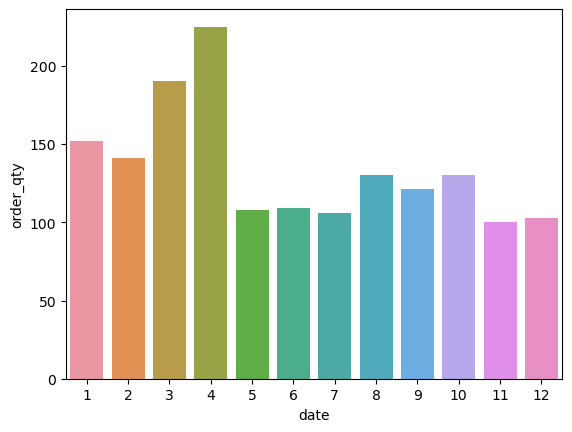

In [110]:
# Plotting orders by time data 
import seaborn as sns
sns.barplot(data=r2, x="date", y="order_qty")  #change with your values
 

# 6 -Total sells by product

a)- Use A simple request with sql without using pd.read_sql.


b)- Use python, this link may help you: 

https://stackoverflow.com/questions/54715244/how-to-join-2-tables-from-different-databases-in-sqlalchemy


In [135]:
q6 = (
'SELECT P.product_name,SUM(S.order_id) AS TotalRevenue'
'FROM sales.order_items AS S'
'JOIN production.products AS P' 
'ON S.product_id=P.product_id'
'GROUP BY P.product_id'
'ORDER BY TotalRevenue DESC'
)

In [125]:
import sqlalchemy as sa


In [123]:
db = sa.create_engine('mysql+mysqldb://{u}:{p}@{h}/{d}'.format(
    u="ahmed", p="aa", h="127.0.0.1", d='production'))


ModuleNotFoundError: No module named 'MySQLdb'

In [118]:
sql = 'SELECT product_id,product_name FROM products'
df1 = pd.read_sql(sql, con=db)
sql2 = 'SELECT product_id,SUM(order_id) as somme FROM order_items as o'
df2 = pd.read_sql(sql2, con=db2)
df2
result1 = pd.merge(df1, df2, how='right', on=['product_id', 'product_id'])
result1


/home/ahmed/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

/home/ahmed/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



DatabaseError: Execution failed on sql 'SELECT product_id,SUM(order_id) as somme FROM order_items as o': 1140 (42000): In aggregated query without GROUP BY, expression #1 of SELECT list contains nonaggregated column 'sales.o.product_id'; this is incompatible with sql_mode=only_full_group_by

In [124]:
fig3 = px.bar(result1, x="somme", y="product_name", orientation='h', barmode="group", title='Top 5 Selling Product Categories in Brazilian E-Commerce (2016-2018)')
fig3.update_layout(yaxis={'categoryorder':'total ascending'})
fig3.show()

NameError: name 'result1' is not defined

# 7- Write a SQL query of Selling Product Categories Quantity



In [126]:
sql = 'SELECT category_name, count(c.category_id) as cat_quantity, p.product_id as product_id FROM categories c,products p where p.category_id = c.category_id '
df1 = pd.read_sql(sql, con=db)

sql2 = 'SELECT product_id from order_items '
df2 = pd.read_sql(sql2, con=db2)



result = pd.merge(df1, df2, how='inner', on=['product_id', 'product_id'])
result



/home/ahmed/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



DatabaseError: Execution failed on sql 'SELECT category_name, count(c.category_id) as cat_quantity, p.product_id as product_id FROM categories c,products p where p.category_id = c.category_id ': 1140 (42000): In aggregated query without GROUP BY, expression #1 of SELECT list contains nonaggregated column 'production.c.category_name'; this is incompatible with sql_mode=only_full_group_by

In [ ]:
# Plotting selling product categories quantity data


# 8- Customers by City

# 9 -Orders by customers and city 

# 10- SQL query of Average, Max, and Min Products (use list_price table)



# 11- Delivery Interval (order_date vs shipped_date) per Month

In [213]:
q9 = (
      
      '     SELECT order_date, day(shipped_date) '
                  
      '     FROM orders '
      '     WHERE order_status = 4 '

      ) 

# Convert the SQL query to Pandas data Frame
r9 = pd.read_sql(q9, db2)
r9

,order_date,day(shipped_date)
0,2016-01-01,3
1,2016-01-01,3
2,2016-01-02,3
3,2016-01-03,5
4,2016-01-03,6
...,...,...
1440,2018-03-30,2
1441,2018-03-30,31
1442,2018-03-31,1
1443,2018-03-31,1


In [215]:
fig6 = px.bar(r9, x="order_date", y="day(shipped_date)", orientation='v', title='Delivery Interval (Estimated vs Actual) per Month in<br>Brazilian E-Commerce (2016-2018)')
fig6.show()

# 12 - Product sales that include only total sales over 20,000

# 13- replace Null values of phone number from sales.customer 

a- Fill the 10th firs empty phone numbers with : 00258631563



b - Fill elements from 11-25empty phone numbers with : 00471295647

In [217]:
q13 = (
      
      '     SELECT * '
                  
      '     FROM customers'
      '     WHERE phone is null '

      ) 

# Convert the SQL query to Pandas data Frame
df13 = pd.read_sql(q13, db2)
df13

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,6,Lyndsey,Bean,None,lyndsey.bean@hotmail.com,769 West Road,Fairport,NY,14450
...,...,...,...,...,...,...,...,...,...
1262,1441,Jamaal,Morrison,None,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1263,1442,Cassie,Cline,None,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1264,1443,Lezlie,Lamb,None,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1265,1444,Ivette,Estes,None,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [218]:
df13.fullna

customer_id       0
first_name        0
last_name         0
phone          1267
email             0
street            0
city              0
state             0
zip_code          0
dtype: int64

In [221]:
a = df13['phone']
a[0:10].fillna('45632',inplace=True)

In [222]:
a

0       45632
1       45632
2       45632
3       45632
4       45632
        ...  
1262     None
1263     None
1264     None
1265     None
1266     None
Name: phone, Length: 1267, dtype: object

# 14- Extract product brands from product numbers!!

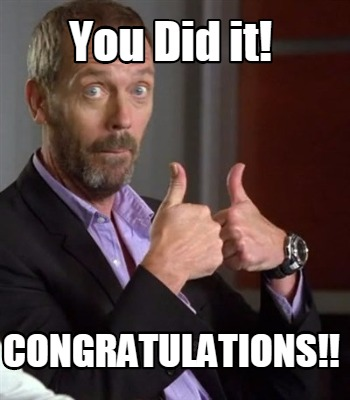

In [223]:

url = 'https://memecreator.org/static/images/memes/4488772.jpg'
IPython.display.Image(url, width = 550)